In [1]:
# Import the necessary libraries, modules
import os 
import re  
import pandas as pd # Pandas library for reading '.csv' files as dataframes
import numpy as np  # Numpy library for creating and modifying arrays.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
import nltk

In [2]:
#os.chdir()
print(os.getcwd())

C:\Users\anime\Ant_Works


In [3]:
train_data=pd.read_csv("train.csv",sep="~", encoding='latin-1')
test_data=pd.read_csv("test.csv",sep="~",encoding='latin-1')

In [4]:
train_data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,11755,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good
1,33912,This motor inn is located about - city blocks ...,Firefox,Tablet,Good
2,10143,It was our first time there and surely not our...,Google Chrome,Mobile,Good
3,33114,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good
4,17464,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good


In [5]:
train_data.shape

(30172, 5)

In [6]:
train_data.dtypes

User_ID          int64
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

In [7]:
train_data.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [8]:
train_data.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [9]:
train_data['Review_length'] = train_data['Description'].apply(len)
train_data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Review_length
0,11755,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good,1230
1,33912,This motor inn is located about - city blocks ...,Firefox,Tablet,Good,615
2,10143,It was our first time there and surely not our...,Google Chrome,Mobile,Good,505
3,33114,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good,424
4,17464,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good,654


In [10]:
test_data.head()

,User_ID,Description,Browser_Used,Device_Used
0,9602,A friend and I stayed in this hotel when we we...,Edge,Desktop
1,8749,I enjoy staying here when I have early flights...,Google Chrome,Mobile
2,15500,I stopped off in Seattle during a train tour o...,Chrome,Mobile
3,5495,I have stayed at this hotel - or - times now f...,Mozilla Firefox,Desktop
4,18570,Excellent location with hop on hop off city tr...,Edge,Mobile


In [11]:
test_data.shape

(8760, 4)

In [12]:
test_data.dtypes

User_ID          int64
Description     object
Browser_Used    object
Device_Used     object
dtype: object

In [13]:
test_data.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used'], dtype='object')

In [14]:
test_data.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
dtype: int64

In [15]:
test_data['Review_length'] = test_data['Description'].apply(len)
test_data.head()

,User_ID,Description,Browser_Used,Device_Used,Review_length
0,9602,A friend and I stayed in this hotel when we we...,Edge,Desktop,3008
1,8749,I enjoy staying here when I have early flights...,Google Chrome,Mobile,535
2,15500,I stopped off in Seattle during a train tour o...,Chrome,Mobile,1289
3,5495,I have stayed at this hotel - or - times now f...,Mozilla Firefox,Desktop,253
4,18570,Excellent location with hop on hop off city tr...,Edge,Mobile,271


### Data Visualization

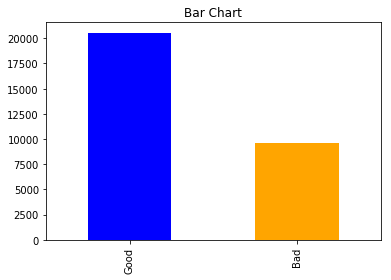

In [16]:
# bar chart
count_types = pd.value_counts(train_data['Is_Response'])
count_types.plot(kind = 'bar', color = ['blue', 'orange'])
plt.title('Bar Chart')
plt.show()

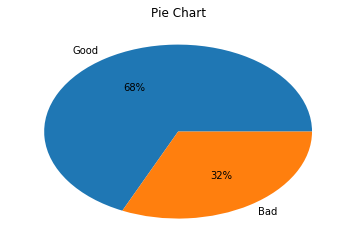

In [17]:
# pie chart
count_types.plot(kind = 'pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Pie Chart')
plt.show()

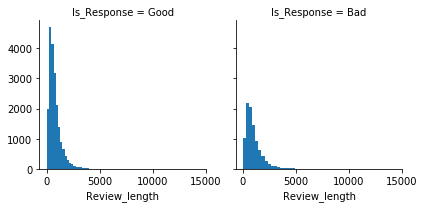

In [18]:
train_data['Description']=train_data['Description'].astype(str)
train_data['Review_length']=train_data['Description'].apply(len)
g = sns.FacetGrid(data=train_data, col='Is_Response')
g.map(plt.hist, 'Review_length', bins=50)

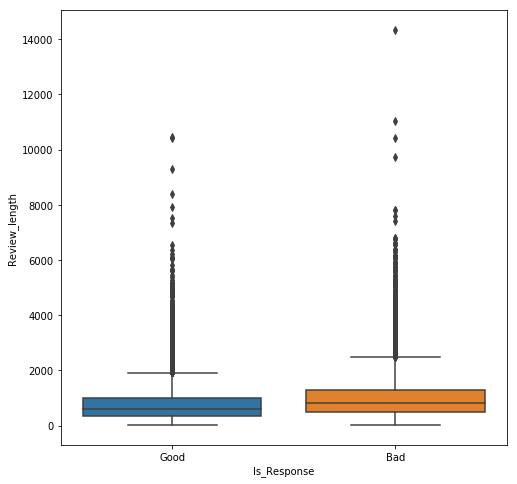

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Is_Response', y='Review_length', data=train_data)

### Check The Response And Their Frequency

In [20]:
# Print the unique classes and their counts/frequencies
classes1 = np.unique(train_data['Is_Response'], return_counts=True) # np.unique returns a tuple with class names and counts
print(classes1[0]) #Print the list of unique classes
print(classes1[1]) #Print the list of frequencies of the above classes

['Bad' 'Good']
[ 9605 20567]


In [21]:
# Print the unique classes and their counts/frequencies
classes2 = np.unique(train_data['Device_Used'], return_counts=True) # np.unique returns a tuple with class names and counts
print(classes2[0]) #Print the list of unique classes
print(classes2[1]) #Print the list of frequencies of the above classes

['Desktop' 'Mobile' 'Tablet']
[11630 11639  6903]


In [22]:
# Print the unique classes and their counts/frequencies
classes3 = np.unique(train_data['Browser_Used'], return_counts=True) # np.unique returns a tuple with class names and counts
print(classes3[0]) #Print the list of unique classes
print(classes3[1]) #Print the list of frequencies of the above classes

['Chrome' 'Edge' 'Firefox' 'Google Chrome' 'IE' 'Internet Explorer'
 'InternetExplorer' 'Mozilla' 'Mozilla Firefox' 'Opera' 'Safari']
[1881 5530 5754 3597 1920 1635 3538 2397 3340  274  306]


In [23]:
pd.value_counts(train_data['Is_Response'])

Good    20567
Bad      9605
Name: Is_Response, dtype: int64

In [24]:
#Convert Response Label to numerical values
train_data['Response'] = train_data['Is_Response'].map({'Good': 1, 'Bad': 0})
train_data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Review_length,Response
0,11755,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good,1230,1
1,33912,This motor inn is located about - city blocks ...,Firefox,Tablet,Good,615,1
2,10143,It was our first time there and surely not our...,Google Chrome,Mobile,Good,505,1
3,33114,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good,424,1
4,17464,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good,654,1


In [25]:
train_data.drop(['User_ID'], axis = 1, inplace = True)
train_data.head()

,Description,Browser_Used,Device_Used,Is_Response,Review_length,Response
0,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good,1230,1
1,This motor inn is located about - city blocks ...,Firefox,Tablet,Good,615,1
2,It was our first time there and surely not our...,Google Chrome,Mobile,Good,505,1
3,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good,424,1
4,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good,654,1


In [26]:
train_data.corr()

,Review_length,Response
Review_length,1.000000,-0.165727
Response,-0.165727,1.000000


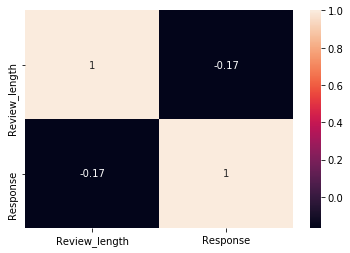

In [27]:
sns.heatmap(data=train_data.corr(), annot=True)

### Remove All Unnecessary Columns

In [28]:
train_data.drop(['Browser_Used','Device_Used','Is_Response','Review_length'], axis = 1, inplace = True)
train_data.head()

,Description,Response
0,After reading mixed reviews I almost didn't bo...,1
1,This motor inn is located about - city blocks ...,1
2,It was our first time there and surely not our...,1
3,"Great hotel in an excellent location, just off...",1
4,We stayed at the hotel for - weeks to get away...,1


In [29]:
pd.value_counts(train_data['Response'])

1    20567
0     9605
Name: Response, dtype: int64

### Preprocessing

In [30]:
#removing the duplicates
train_data=train_data.drop_duplicates(subset=['Description'])
train_data.shape

(30172, 2)

In [31]:
# splitting the columns
X = train_data['Description']
y = train_data['Response']

In [32]:
# converting X and y to numpy array
X = np.array(X)
y = np.array(y)

In [33]:
# coverting the message into lower case, as hello, Hello, HELLO means the same
for i in range(len(X)):
    X[i] = X[i].lower()
    
# first 5 Description after converting text into lower case
print(X[:5])

["after reading mixed reviews i almost didn't book at the w, but i was attending a concert at the pantages theatre and you can't get any more convenient than the w. for those using mass transit, it's literally on top of the hollywood and vine station - take the red line from union station.\nattitude: yes, this is a new and very hip hotel. but every staff member i met was friendly and totally committed to service. from the valet parking to the front desk to room service to the men in black (security folks needed for the club scene), everyone was great.\nfood: i always sample room service my first time at any property. food arrived earlier than promised and i was impressed. the onion soup gratinee was simply the best i've ever had. a simple prime beef cheeseburger was great: a hand formed patty in a light bun with the usual trimmings and condiments. and the french fries... i've never been impressed by fries before but now i am.\nroom: trendy, well appointed and comfortable. the universal

In [34]:
# removing the extra spaces, digits and non word characters like punctuations, ascii etc.
for i in range(len(X)):
    X[i] = re.sub(r'\W',' ',X[i])
    X[i] = re.sub(r'\d',' ',X[i])
    X[i] = re.sub(r'\s+',' ',X[i])

# first 5 messages after removing the extras
print(X[:5])

['after reading mixed reviews i almost didn t book at the w but i was attending a concert at the pantages theatre and you can t get any more convenient than the w for those using mass transit it s literally on top of the hollywood and vine station take the red line from union station attitude yes this is a new and very hip hotel but every staff member i met was friendly and totally committed to service from the valet parking to the front desk to room service to the men in black security folks needed for the club scene everyone was great food i always sample room service my first time at any property food arrived earlier than promised and i was impressed the onion soup gratinee was simply the best i ve ever had a simple prime beef cheeseburger was great a hand formed patty in a light bun with the usual trimmings and condiments and the french fries i ve never been impressed by fries before but now i am room trendy well appointed and comfortable the universal cell phone or other gizmo cha

In [35]:
# removing the stop words
from nltk.corpus import stopwords
for i in range(len(X)):
    words = nltk.word_tokenize(X[i])
    new_words = [word for word in words if word not in stopwords.words('english')]
    X[i] = ' '.join(new_words)
    
# first 5 Description after removing the stopwords
print(X[:5])

['reading mixed reviews almost book w attending concert pantages theatre get convenient w using mass transit literally top hollywood vine station take red line union station attitude yes new hip hotel every staff member met friendly totally committed service valet parking front desk room service men black security folks needed club scene everyone great food always sample room service first time property food arrived earlier promised impressed onion soup gratinee simply best ever simple prime beef cheeseburger great hand formed patty light bun usual trimmings condiments french fries never impressed fries room trendy well appointed comfortable universal cell phone gizmo charger handy worried party noise clubs spend extra bucks exterior facing room trouble noise summary would come absolutely'
 'motor inn located city blocks fisherman warf blocks embarcadero north beach walking distance china town city transportation hotel small clean old updated beds still good room well cleaned daily com

In [36]:
# stemming - get the root of each word
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

for i in range(len(X)):
    words = nltk.word_tokenize(X[i])
    new_words = [stemmer.stem(word) for word in words]
    X[i] = ' '.join(new_words)

# first 5 Description after stemming
print(X[:5])

['read mix review almost book w attend concert pantag theatr get conveni w use mass transit liter top hollywood vine station take red line union station attitud ye new hip hotel everi staff member met friendli total commit servic valet park front desk room servic men black secur folk need club scene everyon great food alway sampl room servic first time properti food arriv earlier promis impress onion soup gratine simpli best ever simpl prime beef cheeseburg great hand form patti light bun usual trim condiment french fri never impress fri room trendi well appoint comfort univers cell phone gizmo charger handi worri parti nois club spend extra buck exterior face room troubl nois summari would come absolut'
 'motor inn locat citi block fisherman warf block embarcadero north beach walk distanc china town citi transport hotel small clean old updat bed still good room well clean daili complaint would bathroom space bit small famili great larg flat screen often staff extrem accommod help reco

### Text Transformation: TF-IDF model

In [37]:
# creating the tf-idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer('english')
X = vectorizer.fit_transform(X)

### Splitting the Dataset

In [38]:
# splitting the dataset into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Number of rows in the total set: {}'.format(train_data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 30172
Number of rows in the training set: 24137
Number of rows in the test set: 6035


## Machine Learning Models

#### Multinomial Naive Bayes Classifier

In [39]:
# running multinomial naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.2)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Multinomial Naive Bayes Classifier: ', accuracy)

Accuracy for Multinomial Naive Bayes Classifier:  0.8510356255178128


#### Linear Support Vector Machine Classifier

In [40]:
# running linear support vector machine classifier
from sklearn.svm import SVC
clf = SVC(kernel = "linear")
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Linear SVM Classifier: ', accuracy)

Accuracy for Linear SVM Classifier:  0.8768848384424193


#### Decision Tree Classifier

In [41]:
# running decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Decision Tree Classifier: ', accuracy)

Accuracy for Decision Tree Classifier:  0.7403479701739851


#### Bernoulli Naive Bayes Classifier

In [42]:
# running bernoulli naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha = 0.2)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Bernoulli Naive Bayes Classifier: ', accuracy)

Accuracy for Bernoulli Naive Bayes Classifier:  0.815741507870754


#### Logistic Regression

In [43]:
# running logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Logistic Regression: ', accuracy)

Accuracy for Logistic Regression:  0.8765534382767192


#### Random Forest Classifier

In [44]:
# running random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Random Forest Classifier: ', accuracy)

Accuracy for Random Forest Classifier:  0.8029826014913007


#### Ada Boost Classifier

In [45]:
# running adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for AdaBoost Classifier: ', accuracy)

Accuracy for AdaBoost Classifier:  0.831814415907208


#### K Neighbour Classifier

In [46]:
# running kneighborsclassifier classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for K Neighbors Classifier: ', accuracy)

Accuracy for K Neighbors Classifier:  0.7903893951946976
